In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('churndataset.csv')
x = dataset.iloc[:,3:-1]
y = dataset['Exited']
dataset['Exited'].value_counts()
dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_onehot = pd.get_dummies(x, drop_first = True)
x_train, x_test, y_train, y_test = train_test_split(x_onehot,y,test_size=0.2,random_state=42, stratify=y)
x_train.describe()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer

from tensorflow.keras.optimizers import Adam

input_shape = x_train.shape[1:]
class_weight = y.value_counts().to_dict()
total_sample = sum(class_weight.values())
class_weight = [total_sample/(len(class_weight)*class_weight[0]), total_sample/(len(class_weight)*class_weight[1])]
class_weight

model = Sequential()
model.add(InputLayer(input_shape))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

class_weight = {0 : 0.6279040562602034, 1 : 2.454590083456063}
class_weight

history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, class_weight = class_weight)

history.history


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.5628 - accuracy: 0.7082
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4861 - accuracy: 0.7707
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4664 - accuracy: 0.7803
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.7883
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4508 - accuracy: 0.7900
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4463 - accuracy: 0.7891
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.7976
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4346 - accuracy: 0.8014
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4289 - accuracy: 0.7996
Epoch 10/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4226 - accuracy: 0.8049

{'loss': [0.5628405213356018,
  0.48614099621772766,
  0.4664093255996704,
  0.45749253034591675,
  0.45075905323028564,
  0.44629544019699097,
  0.4398716986179352,
  0.4345852732658386,
  0.4289371073246002,
  0.42261749505996704],
 'accuracy': [0.7082499861717224,
  0.7707499861717224,
  0.7802500128746033,
  0.7882500290870667,
  0.7900000214576721,
  0.7891250252723694,
  0.7976250052452087,
  0.8013749718666077,
  0.7996249794960022,
  0.8048750162124634]}

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 10, class_weight = class_weight, validation_split = 0.1)

history.history


Epoch 1/10
225/225 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.8032 - val_loss: 0.3646 - val_accuracy: 0.8338
Epoch 2/10
225/225 [==============================] - 1s 2ms/step - loss: 0.4173 - accuracy: 0.8106 - val_loss: 0.4564 - val_accuracy: 0.7887
Epoch 3/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8078 - val_loss: 0.3824 - val_accuracy: 0.8125
Epoch 4/10
225/225 [==============================] - 1s 4ms/step - loss: 0.4113 - accuracy: 0.8110 - val_loss: 0.4181 - val_accuracy: 0.8075
Epoch 5/10
225/225 [==============================] - 1s 4ms/step - loss: 0.4029 - accuracy: 0.8142 - val_loss: 0.3520 - val_accuracy: 0.8400
Epoch 6/10
225/225 [==============================] - 1s 4ms/step - loss: 0.4015 - accuracy: 0.8179 - val_loss: 0.4192 - val_accuracy: 0.8025
Epoch 7/10
225/225 [==============================] - 1s 4ms/step - loss: 0.3952 - accuracy: 0.8146 - val_loss: 0.3642 - val_accuracy: 0.8338
Epoch 

{'loss': [0.42484548687934875,
  0.41730397939682007,
  0.4165709316730499,
  0.41126006841659546,
  0.4029083847999573,
  0.4015485644340515,
  0.3951602876186371,
  0.3881193995475769,
  0.382219523191452,
  0.37879088521003723],
 'accuracy': [0.8031944632530212,
  0.8105555772781372,
  0.8077777624130249,
  0.8109722137451172,
  0.8141666650772095,
  0.8179166913032532,
  0.8145833611488342,
  0.8236111402511597,
  0.8259721994400024,
  0.8254166841506958],
 'val_loss': [0.3645767271518707,
  0.45640555024147034,
  0.38243648409843445,
  0.418089896440506,
  0.3520422875881195,
  0.4191626310348511,
  0.36419689655303955,
  0.41220778226852417,
  0.3971320688724518,
  0.39558038115501404],
 'val_accuracy': [0.8337500095367432,
  0.7887499928474426,
  0.8125,
  0.8075000047683716,
  0.8399999737739563,
  0.8025000095367432,
  0.8337500095367432,
  0.8062499761581421,
  0.8174999952316284,
  0.8112499713897705]}

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


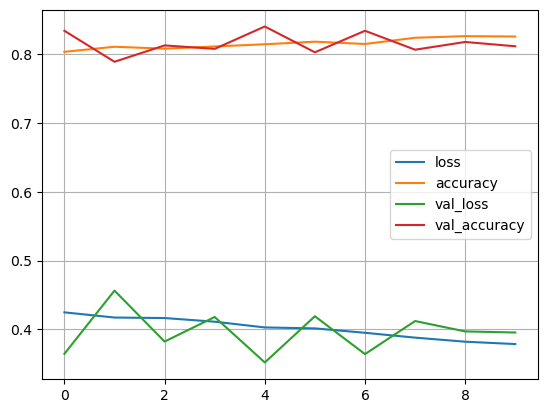

In [6]:
hist = pd.DataFrame(history.history)
hist

hist.plot()
plt.grid()

###
## Model Evaluation
###

In [7]:
from sklearn.metrics import classification_report

In [8]:
y_pred = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [9]:
y_pred

array([[0.03170345],
       [0.10882159],
       [0.04684498],
       ...,
       [0.92714554],
       [0.01257451],
       [0.34206754]], dtype=float32)

In [10]:
y_pred = (y_pred > 0.5).astype(int)

In [11]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000

